# Predicting 2016 vote in the US

Predicting vote in 2016 in the US.  
Precisely, census data is given with various information per county across the US.   
The objective is to build predictors the the county political color based on these informations.

Inspired from: https://kkehoe1985.github.io/2016_election_data_viz/

In [3]:
%matplotlib inline
from pylab import *

In [4]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

# Get the data

* Data are available from: https://blesaux.github.io/teaching/ENSTA

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
os.listdir('gdrive/MyDrive/2024 - Projets de CODE /')
# Modifier la variable du TD en fonction de l'endroit où les données sont stockées
TD_DIR = 'gdrive/MyDrive/2024 - Projets de CODE /2 - Arbres'
sys.path.append(TD_DIR)
os.path.exists(TD_DIR)

True

In [7]:
feature_cols = ['BLACK_FEMALE_rate',
                'BLACK_MALE_rate',
                'Percent of adults with a bachelor\'s degree or higher, 2011-2015',
                'ASIAN_MALE_rate',
                'ASIAN_FEMALE_rate',
                '25-29_rate',
                'age_total_pop',
                '20-24_rate',
                'Deep_Pov_All',
                '30-34_rate',
                'Density per square mile of land area - Population',
                'Density per square mile of land area - Housing units',
                'Unemployment_rate_2015',
                'Deep_Pov_Children',
                'PovertyAllAgesPct2014',
                'TOT_FEMALE_rate',
                'PerCapitaInc',
                'MULTI_FEMALE_rate',
                '35-39_rate',
                'MULTI_MALE_rate',
                'Percent of adults completing some college or associate\'s degree, 2011-2015',
                '60-64_rate',
                '55-59_rate',
                '65-69_rate',
                'TOT_MALE_rate',
                '85+_rate',
                '70-74_rate',
                '80-84_rate',
                '75-79_rate',
                'Percent of adults with a high school diploma only, 2011-2015',
                'WHITE_FEMALE_rate',
                'WHITE_MALE_rate',
                'Amish',
                'Buddhist',
                'Catholic',
                'Christian Generic',
                'Eastern Orthodox',
                'Hindu',
                'Jewish',
                'Mainline Christian',
                'Mormon',
                'Muslim',
                'Non-Catholic Christian',
                'Other',
                'Other Christian',
                'Other Misc',
                'Pentecostal / Charismatic',
                'Protestant Denomination',
                'Zoroastrian']

filtered_cols = ['Percent of adults with a bachelor\'s degree or higher, 2011-2015',
                'Percent of adults completing some college or associate\'s degree, 2011-2015',
                'Percent of adults with a high school diploma only, 2011-2015',
                'Density per square mile of land area - Population',
                'Density per square mile of land area - Housing units',
                'WHITE_FEMALE_rate',
                'WHITE_MALE_rate',
                'BLACK_FEMALE_rate',
                'BLACK_MALE_rate',
                'ASIAN_FEMALE_rate',
                'Catholic',
                'Christian Generic',
                'Jewish',
                '70-74_rate']

In [8]:
import pandas as pd

census_data = pd.read_csv( os.path.join(TD_DIR, 'combined_data.csv') )

print( census_data.shape )
print( census_data.columns.values )

#print(census_data.head(3))

(3145, 78)
['fips' 'votes'
 'Percent of adults with less than a high school diploma, 2011-2015'
 'Percent of adults with a high school diploma only, 2011-2015'
 "Percent of adults completing some college or associate's degree, 2011-2015"
 "Percent of adults with a bachelor's degree or higher, 2011-2015"
 'Unemployment_rate_2015' 'POP_ESTIMATE_2015' 'Amish' 'Buddhist'
 'Catholic' 'Christian Generic' 'Eastern Orthodox' 'Hindu' 'Jewish'
 'Mainline Christian' 'Mormon' 'Muslim' 'Non-Catholic Christian' 'Other'
 'Other Christian' 'Other Misc' 'Pentecostal / Charismatic'
 'Protestant Denomination' 'Zoroastrian' 'MedHHInc2014' 'PerCapitaInc'
 'PovertyUnder18Pct2014' 'PovertyAllAgesPct2014' 'Deep_Pov_All'
 'Deep_Pov_Children' 'Population' 'Housing units'
 'Area in square miles - Total area' 'Area in square miles - Water area'
 'Area in square miles - Land area'
 'Density per square mile of land area - Population'
 'Density per square mile of land area - Housing units' 'age_total_pop'
 '0-4_rate

In [9]:
## fips = county 5-digit codes, first or first two digits indicate the state.
print(census_data['fips'])#.to_csv(index=False))

print(census_data["Percent of adults with a bachelor's degree or higher, 2011-2015"])


0        2013
1        2016
2        2020
3        2050
4        2060
        ...  
3140    56037
3141    56039
3142    56041
3143    56043
3144    56045
Name: fips, Length: 3145, dtype: int64
0       14.0
1       14.7
2       33.2
3       11.6
4       20.0
        ... 
3140    19.6
3141    53.9
3142    19.3
3143    21.1
3144    18.1
Name: Percent of adults with a bachelor's degree or higher, 2011-2015, Length: 3145, dtype: float64


486 2659


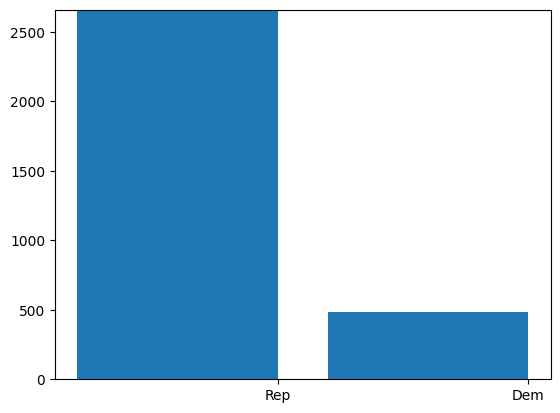

In [10]:
# Analyze reference data
results = list( census_data['Democrat'] )

dem = results.count(1)
rep = results.count(0)

print(dem,rep)

bar([0, 1], [rep, dem])
ylim(0, max(rep, dem))
xticks([0.4, 1.4], ['Rep', 'Dem']);

# Split data in train and test sets

* Prepare random train / test split for validation
* Prepare train / test split such as 1 state only is kept for test

Info: https://scikit-learn.org/stable/model_selection.html

List of US States FIPS code (2 digits):
https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code



In [11]:
## Either random train test split
from sklearn.model_selection import train_test_split

X = census_data[filtered_cols]
y = census_data['Democrat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [12]:
X

,"Percent of adults with a bachelor's degree or higher, 2011-2015","Percent of adults completing some college or associate's degree, 2011-2015","Percent of adults with a high school diploma only, 2011-2015",Density per square mile of land area - Population,Density per square mile of land area - Housing units,WHITE_FEMALE_rate,WHITE_MALE_rate,BLACK_FEMALE_rate,BLACK_MALE_rate,ASIAN_FEMALE_rate,Catholic,Christian Generic,Jewish,70-74_rate
0,14.0,28.2,39.4,0.4,0.1,0.382214,0.375296,0.067586,0.062079,0,190,42,0,0.035106
1,14.7,32.2,37.0,1.3,0.4,0.382214,0.375296,0.067586,0.062079,0,202,56,0,0.035106
2,33.2,35.6,24.1,171.2,66.3,0.382214,0.375296,0.067586,0.062079,0,165,200,1,0.035106
3,11.6,23.7,43.6,0.4,0.1,0.382214,0.375296,0.067586,0.062079,0,549,167,0,0.035106
4,20.0,41.3,30.7,2.0,1.9,0.382214,0.375296,0.067586,0.062079,0,347,6,0,0.035106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,19.6,35.5,35.4,4.2,1.8,0.453570,0.487967,0.006050,0.008448,0,324,131,0,0.024672
3141,53.9,24.1,17.9,5.3,3.2,0.460670,0.491546,0.002768,0.004757,0,131,127,0,0.031870
3142,19.3,34.2,36.2,10.1,4.2,0.473826,0.480165,0.003698,0.003986,0,76,92,0,0.030593
3143,21.1,37.0,29.3,3.8,1.7,0.464697,0.482709,0.002882,0.004443,0,189,244,0,0.049832


In [13]:
X_train

,"Percent of adults with a bachelor's degree or higher, 2011-2015","Percent of adults completing some college or associate's degree, 2011-2015","Percent of adults with a high school diploma only, 2011-2015",Density per square mile of land area - Population,Density per square mile of land area - Housing units,WHITE_FEMALE_rate,WHITE_MALE_rate,BLACK_FEMALE_rate,BLACK_MALE_rate,ASIAN_FEMALE_rate,Catholic,Christian Generic,Jewish,70-74_rate
1552,10.8,21.6,40.7,34.9,13.9,0.360502,0.376461,0.094471,0.151111,0,49,417,0,0.042391
2426,21.0,34.7,36.3,13.5,6.4,0.483006,0.488245,0.001218,0.003167,0,207,557,0,0.046047
1210,57.9,19.3,14.0,1978.2,765.2,0.312851,0.300389,0.102461,0.088746,0,262,187,30,0.032418
2666,21.0,40.8,25.8,27.6,12.2,0.455508,0.442685,0.020692,0.022732,0,35,294,0,0.046921
2042,17.2,33.0,36.0,8.7,4.3,0.467743,0.481142,0.002845,0.002845,0,597,451,0,0.044324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,15.4,31.1,43.7,37.7,23.6,0.472098,0.495232,0.001656,0.002110,0,421,268,0,0.046454
1095,14.4,25.3,41.2,95.8,47.8,0.494262,0.472328,0.006209,0.006616,0,23,566,0,0.046424
1130,11.6,23.6,41.3,29.9,13.5,0.286119,0.292722,0.198739,0.207378,0,38,393,0,0.037881
1294,18.2,35.8,34.8,344.9,147.3,0.407917,0.402685,0.071086,0.073112,0,161,217,0,0.036993


In [14]:
# ## Or 1-state test split

# STATE_FIPS_CODE=34 # 48=Texas, 34=New Jersey
# mask = census_data['fips'].between(48000, 48999)
# census_data_train = census_data[~mask]
# census_data_test = census_data[mask]

# print(census_data_test['fips'])

# X_train = census_data_train[feature_cols]
# y_train = census_data_train['Democrat']
# X_test = census_data_test[feature_cols]
# y_test = census_data_test['Democrat']

# print(X_train.head(2))
# print(y_test.head(2))

# Decision tree classification

* Build a decision tree for classification
* Predict vote for test counties

Info: https://scikit-learn.org/stable/modules/tree.html

Info: https://scikit-learn.org/stable/modules/model_evaluation.html

In [15]:
# Train decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(X_train, y_train)

y_predic = clf.predict(X_test)
acc = (y_predic == y_test).mean()
print(acc)


0.902542372881356


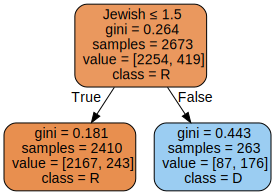

In [16]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=X_train.columns.values,
                     class_names=["R","D"],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [17]:
# Process test data and estimate performance statistics
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_test, y_predic)
print("Balanced Accuracy:", balanced_accuracy)

# Why balanced accuracy is better than overall accuracy in this case? because the dataset is heavily inbalanced

Balanced Accuracy: 0.700313248571955



---

# Random Forest: a bagging example

In this part, the objective it to build a **custom random forest**.

**After the course**, check built-in scikit-learn random forests: https://scikit-learn.org/stable/modules/ensemble.html

* Train various random trees on subsets of the training set
* Use a voting procedure to aggregate the individual predictions on the
* Evaluate:
  * Evaluate the custom forest;
  * Compare with previous decision tree;
  * Compare with individual trees of the forest.

Numpy tips: [np.arange](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html), [numpy.sum](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.sum.html), [numpy.mean](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.mean.html), [numpy.where](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.where.html)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Define the function to create subsets
def create_subsets(X, y, nb_subsets):
    if nb_subsets == 1:
        return [(X, y)]
    else:
        X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5)
        if nb_subsets % 2 == 1:
            # If odd, allocate one extra subset to one branch
            return create_subsets(X1, y1, nb_subsets // 2 + 1) + create_subsets(X2, y2, nb_subsets // 2)
        else:
            return create_subsets(X1, y1, nb_subsets // 2) + create_subsets(X2, y2, nb_subsets // 2)

# Number of trees in the forest
nb_trees = 15
forest = []

# Create subsets for training each tree
subsets = create_subsets(X_train, y_train, nb_trees)

for ss in range(nb_trees):
    # Bagging for subset: Randomly sample indices from the training data subset
    X_subset, y_subset = subsets[ss]
    subset_indices = np.random.choice(len(X_subset), len(X_subset), replace=True)
    X_bagged = X_subset.iloc[subset_indices]
    y_bagged = y_subset.iloc[subset_indices]

    # Train a single decision tree on the bagged subset
    clf = DecisionTreeClassifier(max_depth=7)
    clf.fit(X_bagged, y_bagged)

    # Evaluate the single tree on the test data (optional for monitoring individual tree performance)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Tree {ss+1} Accuracy: {accuracy}")

    # Add the trained tree to the forest
    forest.append(clf)



Tree 1 Accuracy: 0.8686440677966102
Tree 2 Accuracy: 0.923728813559322
Tree 3 Accuracy: 0.9046610169491526
Tree 4 Accuracy: 0.9088983050847458
Tree 5 Accuracy: 0.913135593220339
Tree 6 Accuracy: 0.8940677966101694
Tree 7 Accuracy: 0.8983050847457628
Tree 8 Accuracy: 0.8940677966101694
Tree 9 Accuracy: 0.8686440677966102
Tree 10 Accuracy: 0.9046610169491526
Tree 11 Accuracy: 0.902542372881356
Tree 12 Accuracy: 0.9004237288135594
Tree 13 Accuracy: 0.885593220338983
Tree 14 Accuracy: 0.8940677966101694
Tree 15 Accuracy: 0.9173728813559322


In [19]:
forest

[DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=9)]

In [29]:
from collections import Counter

# Vote function for the forest
def forest_predic(data,forest):
    y_predics = []

    # Collect predictions from each tree
    for clf in forest:
        y_predics.append(clf.predict(data))

    # Transpose the list of predictions to get predictions for each sample across all trees
    y_predics = np.array(y_predics).T  # Shape: (num_samples, num_trees)
    print(y_predics)

    # Majority voting for each sample
    y_maj = [Counter(pred).most_common(1)[0][0] for pred in y_predics]
    print(y_maj)

    return np.array(y_maj)  # Return as a NumPy array for compatibility with other functions

y_predic = forest_predic(X_test,forest)
accuracy = accuracy_score(y_test, y_predic)
print(f"Forest has Accuracy: {accuracy}")

[[0 0 1 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 